In [83]:
from sklearn import datasets, linear_model
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [2]:
target_url = 'http://users.stat.ufl.edu/~winner/data/airq402.dat'
response = requests.get(target_url)
data_dat = response.text
data_list = data_dat.splitlines() 
data_content = [e.split() for e in data_list]
print(data_content)

[['CAK', 'ATL', '114.47', '528', '424.56', 'FL', '70.19', '111.03', 'FL', '70.19', '111.03'], ['CAK', 'MCO', '122.47', '860', '276.84', 'FL', '75.10', '123.09', 'DL', '17.23', '118.94'], ['ALB', 'ATL', '214.42', '852', '215.76', 'DL', '78.89', '223.98', 'CO', '2.77', '167.12'], ['ALB', 'BWI', '69.40', '288', '606.84', 'WN', '96.97', '68.86', 'WN', '96.97', '68.86'], ['ALB', 'ORD', '158.13', '723', '313.04', 'UA', '39.79', '161.36', 'WN', '15.34', '145.42'], ['ALB', 'FLL', '135.17', '1204', '199.02', 'WN', '40.68', '137.97', 'DL', '17.09', '127.69'], ['ALB', 'LAS', '152.85', '2237', '237.17', 'WN', '59.94', '148.59', 'WN', '59.94', '148.59'], ['ALB', 'LAX', '190.73', '2467', '191.95', 'DL', '17.89', '205.06', 'US', '16.59', '174.00'], ['ALB', 'MCO', '129.35', '1073', '550.54', 'WN', '76.84', '127.69', 'WN', '76.84', '127.69'], ['ALB', 'TPA', '134.17', '1130', '202.93', 'US', '35.40', '132.91', 'DL', '26.40', '124.78'], ['ABQ', 'ATL', '212.49', '1269', '198.80', 'DL', '68.39', '226.79', 

In [3]:
cols = ['City1', 'City2', 'Average Fare', 'Distance', 'Average weekly passengers',
                   'market leading airline', 'market share', 'Average fare', 'Low price airline',
                   'market share', 'price']

df = pd.DataFrame(data_content,columns=cols)
df

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,73.44


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare                 1000 non-null object
Distance                     1000 non-null object
Average weekly passengers    1000 non-null object
market leading airline       1000 non-null object
market share                 1000 non-null object
Average fare                 1000 non-null object
Low price airline            1000 non-null object
market share                 1000 non-null object
price                        1000 non-null object
dtypes: object(11)
memory usage: 86.1+ KB


In [5]:
df.columns = df.columns.str.replace(' ','_')

In [6]:
df.columns

Index(['City1', 'City2', 'Average_Fare', 'Distance',
       'Average_weekly_passengers', 'market_leading_airline', 'market_share',
       'Average_fare', 'Low_price_airline', 'market_share', 'price'],
      dtype='object')

In [7]:
df.isnull().sum()

City1                        0
City2                        0
Average_Fare                 0
Distance                     0
Average_weekly_passengers    0
market_leading_airline       0
market_share                 0
Average_fare                 0
Low_price_airline            0
market_share                 0
price                        0
dtype: int64

In [8]:
df.rename(columns = {df.columns[7] : 'Average_Fare_1'},inplace=True)

In [9]:
col_names = df.columns.values
col_names[9] = 'market_share_1'
df.columns = col_names

In [10]:
df.head()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_Fare_1,Low_price_airline,market_share_1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [11]:
df1 = df.drop(['Average_Fare_1'],axis=1)
df1.head()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Low_price_airline,market_share_1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,WN,15.34,145.42


In [12]:
df1['Average_Fare'] = df1['Average_Fare'].astype(float)
df1['Distance'] = df1['Distance'].astype(float)
df1['Average_weekly_passengers'] = df1['Average_weekly_passengers'].astype(float)
df1['market_share'] = df1['market_share'].astype(float)
df1['market_share_1'] = df1['market_share_1'].astype(float)
df1['price'] = df1['price'].astype(float)

In [13]:
df1.shape

(1000, 10)

In [14]:
df1.describe()

,Average_Fare,Distance,Average_weekly_passengers,market_share,market_share_1,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,100.000000,387.940000


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average_Fare                 1000 non-null float64
Distance                     1000 non-null float64
Average_weekly_passengers    1000 non-null float64
market_leading_airline       1000 non-null object
market_share                 1000 non-null float64
Low_price_airline            1000 non-null object
market_share_1               1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), object(4)
memory usage: 78.2+ KB


In [16]:
df1.describe(include = ['O'])

,City1,City2,market_leading_airline,Low_price_airline
count,1000,1000,1000,1000
unique,90,85,16,19
top,ATL,TPA,WN,WN
freq,64,46,257,230


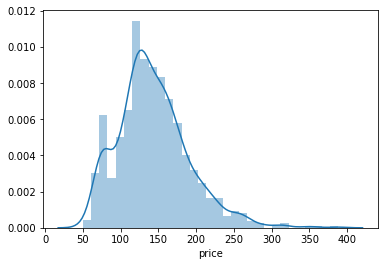

In [17]:
sns.distplot(df1['price'])  # univariate analysis of dependent or target variable

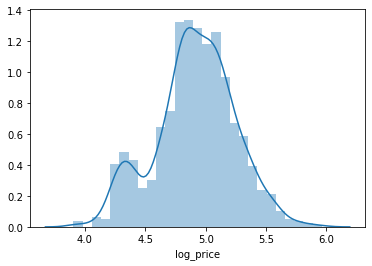

In [18]:
df1['log_price']  = np.log(df1['price'])
sns.distplot(df1['log_price'])

In [19]:
df1['log_price'].skew()

-0.19956396360985215

In [20]:
df1_num = df1.select_dtypes(include = ['float64','int64'])
df1_num

,Average_Fare,Distance,Average_weekly_passengers,market_share,market_share_1,price,log_price
0,114.47,528.0,424.56,70.19,70.19,111.03,4.709800
1,122.47,860.0,276.84,75.10,17.23,118.94,4.778619
2,214.42,852.0,215.76,78.89,2.77,167.12,5.118712
3,69.40,288.0,606.84,96.97,96.97,68.86,4.232075
4,158.13,723.0,313.04,39.79,15.34,145.42,4.979626
...,...,...,...,...,...,...,...
995,136.16,1104.0,184.34,33.37,28.65,118.51,4.774997
996,83.28,200.0,232.71,99.57,99.57,82.55,4.413404
997,159.97,814.0,843.80,46.19,13.89,159.02,5.069030
998,73.57,174.0,214.45,99.74,99.74,73.44,4.296469


In [21]:
df1_cat = df1.select_dtypes(include = ['object'])
df1_cat

,City1,City2,market_leading_airline,Low_price_airline
0,CAK,ATL,FL,FL
1,CAK,MCO,FL,DL
2,ALB,ATL,DL,CO
3,ALB,BWI,WN,WN
4,ALB,ORD,UA,WN
...,...,...,...,...
995,SYR,TPA,US,DL
996,TLH,TPA,FL,FL
997,TPA,IAD,US,DL
998,TPA,PBI,WN,WN


In [22]:
df1_num.corr()

,Average_Fare,Distance,Average_weekly_passengers,market_share,market_share_1,price,log_price
Average_Fare,1.000000,0.587169,-0.126175,-0.234142,-0.458660,0.866410,0.866964
Distance,0.587169,1.000000,-0.090131,-0.531406,-0.367831,0.583239,0.607117
Average_weekly_passengers,-0.126175,-0.090131,1.000000,-0.067605,0.034241,-0.142314,-0.171653
market_share,-0.234142,-0.531406,-0.067605,1.000000,0.306832,-0.307672,-0.345226
market_share_1,-0.458660,-0.367831,0.034241,0.306832,1.000000,-0.240186,-0.307425
price,0.866410,0.583239,-0.142314,-0.307672,-0.240186,1.000000,0.972432
log_price,0.866964,0.607117,-0.171653,-0.345226,-0.307425,0.972432,1.000000


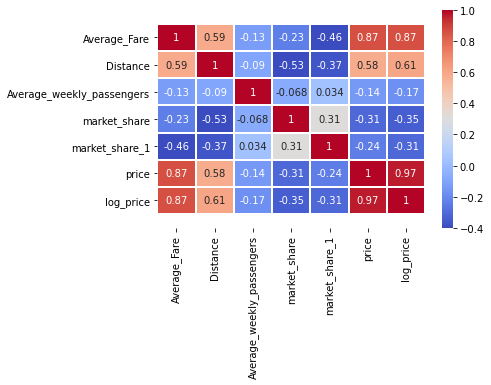

In [23]:
ax = sns.heatmap(df1_num.corr(),vmin=-0.4,linewidths=1,cmap='coolwarm',annot=True)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
ax

In [24]:
#average_fare , distance highly correlated with price
#multi-collinearity: distance and market_share
#avg-weekly-share and market_share_1 has lowest collinearity


In [25]:
#bivariate

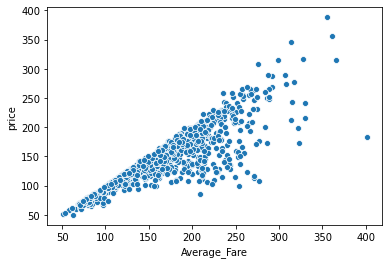

In [26]:
sns.scatterplot(x='Average_Fare',y='price',data=df1_num)

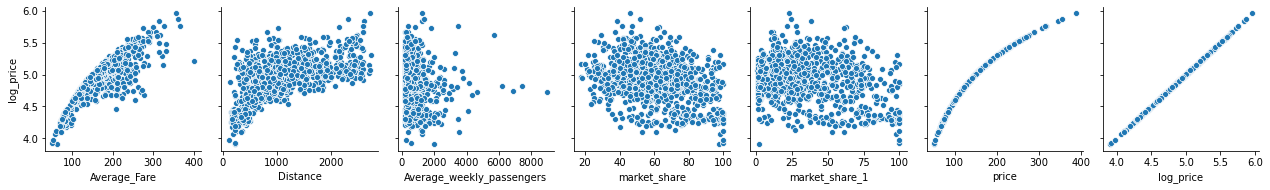

In [27]:
sns.pairplot(data=df1_num,x_vars=df1_num.columns,y_vars=['log_price'])

In [28]:
df1_cat['City1'].value_counts()

ATL    64
ORD    63
DFW    52
BWI    47
IAH    38
       ..
MSN     1
ROC     1
GPT     1
MYR     1
TLH     1
Name: City1, Length: 90, dtype: int64

In [29]:
df1_cat['City2'].value_counts()

TPA    46
MCO    43
SEA    42
LGA    42
IAD    40
       ..
DSM     1
PHF     1
FNT     1
GPT     1
PWM     1
Name: City2, Length: 85, dtype: int64

In [30]:
sns.__version__

'0.10.1'

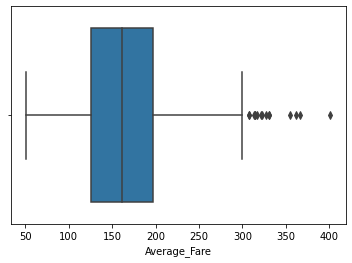

In [31]:
sns.boxplot(df1_num['Average_Fare'])

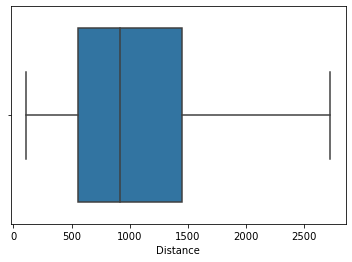

In [32]:
sns.boxplot(df1_num['Distance'])

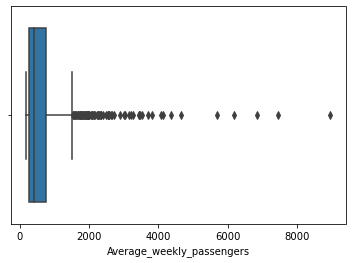

In [33]:
sns.boxplot(df1_num['Average_weekly_passengers'])

In [34]:
passe = df1_num['Average_weekly_passengers'].values
p1_passe = np.percentile(passe,1)
p99_passe = np.percentile(passe,99)


In [35]:
df1_num.loc[df1_num['Average_weekly_passengers'] < p1_passe,'Average_weekly_passengers'] = p1_passe
df1_num.loc[df1_num['Average_weekly_passengers'] > p99_passe,'Average_weekly_passengers'] = p99_passe

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


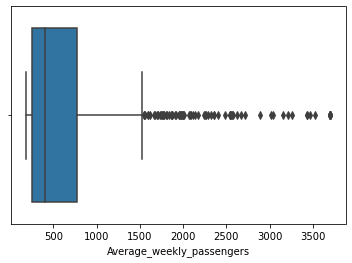

In [36]:
sns.boxplot(df1_num['Average_weekly_passengers'])

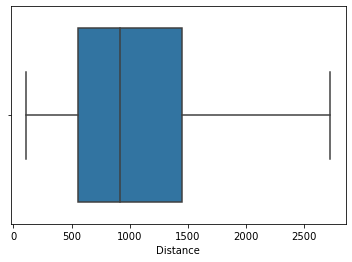

In [37]:
sns.boxplot(df1_num['Distance'])

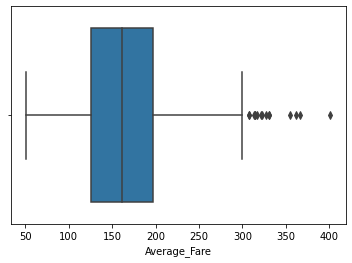

In [38]:
sns.boxplot(df1_num['Average_Fare'])

In [39]:
from scipy.stats import zscore

In [40]:
df1_num['z_Average_Fare'] = zscore(df1_num['Average_Fare'])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
df1_num

,Average_Fare,Distance,Average_weekly_passengers,market_share,market_share_1,price,log_price,z_Average_Fare
0,114.47,528.0,424.56,70.19,70.19,111.03,4.709800,-0.883762
1,122.47,860.0,276.84,75.10,17.23,118.94,4.778619,-0.739195
2,214.42,852.0,215.76,78.89,2.77,167.12,5.118712,0.922418
3,69.40,288.0,606.84,96.97,96.97,68.86,4.232075,-1.698214
4,158.13,723.0,313.04,39.79,15.34,145.42,4.979626,-0.094789
...,...,...,...,...,...,...,...,...
995,136.16,1104.0,184.34,33.37,28.65,118.51,4.774997,-0.491805
996,83.28,200.0,232.71,99.57,99.57,82.55,4.413404,-1.447391
997,159.97,814.0,843.80,46.19,13.89,159.02,5.069030,-0.061539
998,73.57,174.0,214.45,99.74,99.74,73.44,4.296469,-1.622859


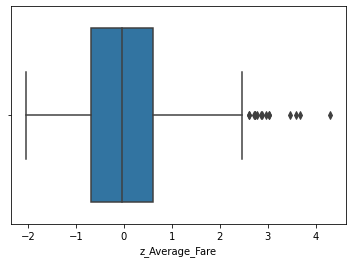

In [42]:
sns.boxplot(df1_num['z_Average_Fare'])

In [43]:
q1 = df1_num['Average_Fare'].quantile(q=0.25)
q3 = df1_num['Average_Fare'].quantile(q=0.75)
iqr = q3-q1
ll = q1 - iqr
ul = q3 + iqr

In [44]:
df1_num = df1_num[(df1_num['Average_Fare']>ll) & (df1_num['Average_Fare']<ul)]

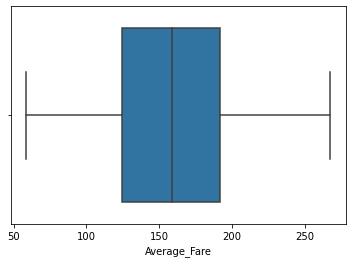

In [45]:
sns.boxplot(df1_num['Average_Fare'])

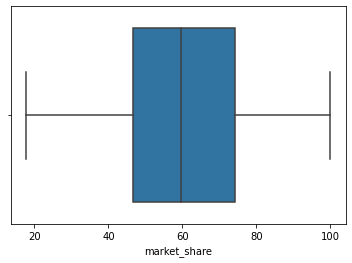

In [46]:
sns.boxplot(df1_num['market_share'])

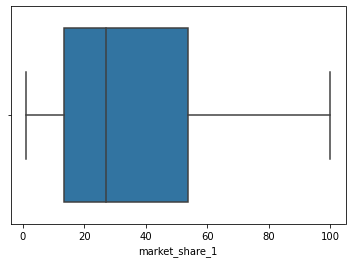

In [47]:
sns.boxplot(df1_num['market_share_1'])

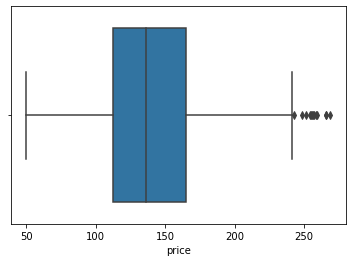

In [48]:
sns.boxplot(df1_num['price'])

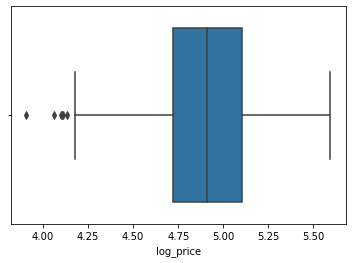

In [49]:
sns.boxplot(df1_num['log_price'])

In [50]:
q1 = df1_num['log_price'].quantile(q=0.25)
q3 = df1_num['log_price'].quantile(q=0.75)
iqr = q3-q1
ll = q1 - iqr
ul = q3 + iqr

In [51]:
df1_num = df1_num[(df1_num['log_price']>ll) & (df1_num['log_price']<ul)]

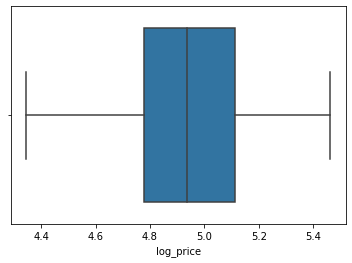

In [52]:
sns.boxplot(df1_num['log_price'])

In [53]:
df1_num

,Average_Fare,Distance,Average_weekly_passengers,market_share,market_share_1,price,log_price,z_Average_Fare
0,114.47,528.0,424.56,70.19,70.19,111.03,4.709800,-0.883762
1,122.47,860.0,276.84,75.10,17.23,118.94,4.778619,-0.739195
2,214.42,852.0,215.76,78.89,2.77,167.12,5.118712,0.922418
4,158.13,723.0,313.04,39.79,15.34,145.42,4.979626,-0.094789
5,135.17,1204.0,199.02,40.68,17.09,127.69,4.849605,-0.509696
...,...,...,...,...,...,...,...,...
993,131.47,1216.0,359.23,73.25,73.25,126.38,4.839293,-0.576558
995,136.16,1104.0,184.34,33.37,28.65,118.51,4.774997,-0.491805
996,83.28,200.0,232.71,99.57,99.57,82.55,4.413404,-1.447391
997,159.97,814.0,843.80,46.19,13.89,159.02,5.069030,-0.061539


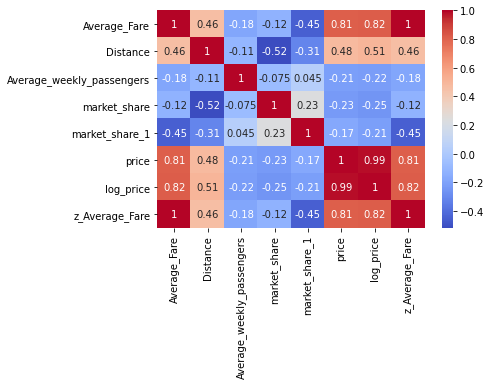

In [54]:
sns.heatmap(df1_num.corr(),annot=True,cmap='coolwarm')

In [55]:
df1_cat

,City1,City2,market_leading_airline,Low_price_airline
0,CAK,ATL,FL,FL
1,CAK,MCO,FL,DL
2,ALB,ATL,DL,CO
3,ALB,BWI,WN,WN
4,ALB,ORD,UA,WN
...,...,...,...,...
995,SYR,TPA,US,DL
996,TLH,TPA,FL,FL
997,TPA,IAD,US,DL
998,TPA,PBI,WN,WN


In [56]:
df1_cat['City1'].value_counts()

ATL    64
ORD    63
DFW    52
BWI    47
IAH    38
       ..
MSN     1
ROC     1
GPT     1
MYR     1
TLH     1
Name: City1, Length: 90, dtype: int64

In [57]:
df1_cat['City2'].value_counts()

TPA    46
MCO    43
SEA    42
LGA    42
IAD    40
       ..
DSM     1
PHF     1
FNT     1
GPT     1
PWM     1
Name: City2, Length: 85, dtype: int64

In [58]:
df1_cat['market_leading_airline'].value_counts()

WN    257
DL    162
AA    135
UA     91
NW     86
CO     69
US     68
AS     32
HP     30
YX     16
FL     16
B6     14
NK     10
TZ     10
F9      3
G4      1
Name: market_leading_airline, dtype: int64

In [59]:
df1_cat['Low_price_airline'].value_counts()

WN    230
DL    151
AA    129
US    101
FL     60
HP     58
UA     55
CO     45
TZ     34
NW     33
F9     30
AS     27
NK     16
B6     15
SY      7
AX      3
YX      3
AQ      2
G4      1
Name: Low_price_airline, dtype: int64

In [61]:
MLA_Dum = pd.get_dummies(df1_cat,columns = ['market_leading_airline'])
MLA_Dum.head()

,City1,City2,Low_price_airline,market_leading_airline_AA,market_leading_airline_AS,market_leading_airline_B6,market_leading_airline_CO,market_leading_airline_DL,market_leading_airline_F9,market_leading_airline_FL,market_leading_airline_G4,market_leading_airline_HP,market_leading_airline_NK,market_leading_airline_NW,market_leading_airline_TZ,market_leading_airline_UA,market_leading_airline_US,market_leading_airline_WN,market_leading_airline_YX
0,CAK,ATL,FL,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,CAK,MCO,DL,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,ALB,ATL,CO,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,ALB,BWI,WN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,ALB,ORD,WN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [63]:
LPA_Dum = pd.get_dummies(df1_cat,columns = ['Low_price_airline'])
LPA_Dum.head()

,City1,City2,market_leading_airline,Low_price_airline_AA,Low_price_airline_AQ,Low_price_airline_AS,Low_price_airline_AX,Low_price_airline_B6,Low_price_airline_CO,Low_price_airline_DL,...,Low_price_airline_G4,Low_price_airline_HP,Low_price_airline_NK,Low_price_airline_NW,Low_price_airline_SY,Low_price_airline_TZ,Low_price_airline_UA,Low_price_airline_US,Low_price_airline_WN,Low_price_airline_YX
0,CAK,ATL,FL,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CAK,MCO,FL,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,ALB,ATL,DL,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,ALB,BWI,WN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,ALB,ORD,UA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
df1_cat = df1_cat.drop(['City1','City2'],axis=1)

In [65]:
df1_cat = pd.concat([MLA_Dum,LPA_Dum],axis=1)
df1_cat.head()

,City1,City2,Low_price_airline,market_leading_airline_AA,market_leading_airline_AS,market_leading_airline_B6,market_leading_airline_CO,market_leading_airline_DL,market_leading_airline_F9,market_leading_airline_FL,...,Low_price_airline_G4,Low_price_airline_HP,Low_price_airline_NK,Low_price_airline_NW,Low_price_airline_SY,Low_price_airline_TZ,Low_price_airline_UA,Low_price_airline_US,Low_price_airline_WN,Low_price_airline_YX
0,CAK,ATL,FL,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,CAK,MCO,DL,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,ALB,ATL,CO,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ALB,BWI,WN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,ALB,ORD,WN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [66]:
df1_cat = df1_cat.drop(columns = ['City1','City2','Low_price_airline','market_leading_airline'],axis=1)
df1_cat.head()

,market_leading_airline_AA,market_leading_airline_AS,market_leading_airline_B6,market_leading_airline_CO,market_leading_airline_DL,market_leading_airline_F9,market_leading_airline_FL,market_leading_airline_G4,market_leading_airline_HP,market_leading_airline_NK,...,Low_price_airline_G4,Low_price_airline_HP,Low_price_airline_NK,Low_price_airline_NW,Low_price_airline_SY,Low_price_airline_TZ,Low_price_airline_UA,Low_price_airline_US,Low_price_airline_WN,Low_price_airline_YX
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
df_final = pd.concat([df1_num,df1_cat],axis=1)
df_final

,Average_Fare,Distance,Average_weekly_passengers,market_share,market_share_1,price,log_price,z_Average_Fare,market_leading_airline_AA,market_leading_airline_AS,...,Low_price_airline_G4,Low_price_airline_HP,Low_price_airline_NK,Low_price_airline_NW,Low_price_airline_SY,Low_price_airline_TZ,Low_price_airline_UA,Low_price_airline_US,Low_price_airline_WN,Low_price_airline_YX
0,114.47,528.0,424.56,70.19,70.19,111.03,4.709800,-0.883762,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860.0,276.84,75.10,17.23,118.94,4.778619,-0.739195,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852.0,215.76,78.89,2.77,167.12,5.118712,0.922418,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723.0,313.04,39.79,15.34,145.42,4.979626,-0.094789,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,136.16,1104.0,184.34,33.37,28.65,118.51,4.774997,-0.491805,0,0,...,0,0,0,0,0,0,0,0,0,0
996,83.28,200.0,232.71,99.57,99.57,82.55,4.413404,-1.447391,0,0,...,0,0,0,0,0,0,0,0,0,0
997,159.97,814.0,843.80,46.19,13.89,159.02,5.069030,-0.061539,0,0,...,0,0,0,0,0,0,0,0,0,0
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,1,0


In [68]:
#need to remove missing values

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
train,test = train_test_split(df_final,test_size=0.3,random_state=7)

In [71]:
train.head()

,Average_Fare,Distance,Average_weekly_passengers,market_share,market_share_1,price,log_price,z_Average_Fare,market_leading_airline_AA,market_leading_airline_AS,...,Low_price_airline_G4,Low_price_airline_HP,Low_price_airline_NK,Low_price_airline_NW,Low_price_airline_SY,Low_price_airline_TZ,Low_price_airline_UA,Low_price_airline_US,Low_price_airline_WN,Low_price_airline_YX
822,200.11,1155.0,274.34,25.47,21.39,184.32,5.216673,0.663825,0,0,...,0,0,0,0,0,0,1,0,0,0
188,108.11,709.0,214.67,33.41,19.79,86.79,4.463491,-0.998692,0,0,...,0,0,0,1,0,0,0,0,0,0
251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,0,0
71,130.36,665.0,1995.43,53.12,13.78,114.65,4.741884,-0.596616,0,0,...,0,0,0,0,0,0,0,0,0,0
664,201.61,2175.0,329.02,49.95,49.95,179.46,5.189952,0.690931,0,0,...,0,1,0,0,0,0,0,0,0,0


In [72]:
test.head()

,Average_Fare,Distance,Average_weekly_passengers,market_share,market_share_1,price,log_price,z_Average_Fare,market_leading_airline_AA,market_leading_airline_AS,...,Low_price_airline_G4,Low_price_airline_HP,Low_price_airline_NK,Low_price_airline_NW,Low_price_airline_SY,Low_price_airline_TZ,Low_price_airline_UA,Low_price_airline_US,Low_price_airline_WN,Low_price_airline_YX
778,169.68,1276.0,1385.32,47.67,11.76,141.27,4.950673,0.113929,0,0,...,0,0,0,0,1,0,0,0,0,0
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,...,0,0,0,0,0,0,0,0,0,0
271,192.69,594.0,206.63,61.38,61.38,189.46,5.244178,0.529739,0,0,...,0,0,0,0,0,0,1,0,0,0
802,166.19,1977.0,231.63,42.13,17.92,151.51,5.020652,0.050862,0,0,...,0,0,0,0,0,0,0,0,0,0
216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0


In [78]:
train_X = train.drop('price',axis=1)
train_Y = train['price']

In [79]:
train_X.shape

(700, 42)

In [80]:
train_Y.shape

(700,)

In [81]:
data = [[np.NaN,42,'First Batting',np.NaN],[48,39,'First Batting','not out'],[75,51,'Chasing','out'],[15,8,'Chasing','out']
        ,[32,27,'First Batting','not out'],[21,np.NaN,'First Batting','out'],[np.NaN,26,'Chasing','not out'],[9,6,'Chasing','out'],
       [32,np.NaN,'First Batting','out'],[np.NaN,19,'First Batting',np.NaN],[52,23,'Chasing',np.NaN],[np.NaN,6,'Chasing','not out']]
df = pd.DataFrame(data,columns=['Runs_Scored','Balls_Faced','First_Batting/Chasing','Wicket'])
df.head()

,Runs_Scored,Balls_Faced,First_Batting/Chasing,Wicket
0,NaN,42.0,First Batting,NaN
1,48.0,39.0,First Batting,not out
2,75.0,51.0,Chasing,out
3,15.0,8.0,Chasing,out
4,32.0,27.0,First Batting,not out


In [91]:
df.shape

(12, 4)

In [82]:
#Write a code to print the average runs scored and median of Balls_Faced while chasing and first batting individually


In [93]:
df.pivot_table(index='First_Batting/Chasing',aggfunc={'Runs_Scored':'mean','Balls_Faced':'median'})

,Balls_Faced,Runs_Scored
First_Batting/Chasing,,
Chasing,15.5,37.75
First Batting,33.0,33.25


In [87]:
df.groupby(['First_Batting/Chasing']).agg({'Runs_Scored' : 'mean', 'Balls_Faced' : 'median'})


,Runs_Scored,Balls_Faced
First_Batting/Chasing,,
Chasing,37.75,15.5
First Batting,33.25,33.0


In [90]:
#Write a code to print the frequency table / crosstab  for runs scored and wickets of the match from the given dataframe


In [94]:
print(pd.crosstab(df.Runs_Scored, df.Wicket))


Wicket       not out  out
Runs_Scored              
9.0                0    1
15.0               0    1
21.0               0    1
32.0               1    1
48.0               1    0
75.0               0    1


In [95]:
data = [['Male',139,123,150,143,73.3,1038437],
['Male',133,129, 128,172,68.8 ,965353],
['Female',137,132,134,147,65.0, 951545],
['Female',99, 90, 110, 146,69.0 ,928799],
['Female',138, 136, 131, 138,64.5,991305],
['Female', 92, 90, 98 ,175, 66.0,854258],
['Male',89, 93, 84, 134 ,66.3,904858],
['Male', 133, 114, 147,172,68.8,955466],
['Female', 132, 129, 124,118,64.5,833868],
['Male', 141, 150, 128,151,70.0,1079549],
['Male', 135, 129, 124,155,69.0,924059],
['Female', 140, 120, 147, 155,70.5,856472],
['Female', 96, 100, 90, 146,66.0,878897],
['Female', 83, 71, 96, 135,68.0,865363],
['Female',132,132,120,127,68.5,852244],
['Male',100,96,102,178,73.5,945088],
['Female',101,112,84,136,66.3,808020],
['Male',80,77,86,1800000000,70.0,889083]]
df = pd.DataFrame(data,columns=['Gender','FSIQ','VIQ','PIQ','Weight','Height','MRI_Count'])
df

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Male,139,123,150,143,73.3,1038437
1,Male,133,129,128,172,68.8,965353
2,Female,137,132,134,147,65.0,951545
3,Female,99,90,110,146,69.0,928799
4,Female,138,136,131,138,64.5,991305
5,Female,92,90,98,175,66.0,854258
6,Male,89,93,84,134,66.3,904858
7,Male,133,114,147,172,68.8,955466
8,Female,132,129,124,118,64.5,833868
9,Male,141,150,128,151,70.0,1079549


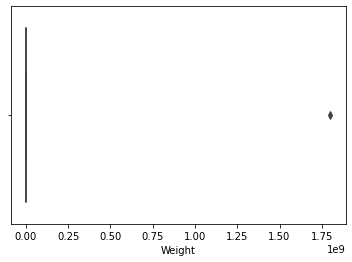

In [96]:
sns.boxplot(df['Weight'])

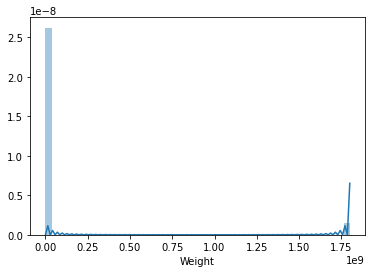

In [100]:
sns.distplot(df['Weight'])

In [101]:
df['Weight'].skew()

4.242640687119273

In [102]:
df['log_weight'] = np.log(df['Weight'])
df

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,log_weight
0,Male,139,123,150,143,73.3,1038437,4.962845
1,Male,133,129,128,172,68.8,965353,5.147494
2,Female,137,132,134,147,65.0,951545,4.990433
3,Female,99,90,110,146,69.0,928799,4.983607
4,Female,138,136,131,138,64.5,991305,4.927254
5,Female,92,90,98,175,66.0,854258,5.164786
6,Male,89,93,84,134,66.3,904858,4.897840
7,Male,133,114,147,172,68.8,955466,5.147494
8,Female,132,129,124,118,64.5,833868,4.770685
9,Male,141,150,128,151,70.0,1079549,5.017280


In [103]:
numeric = df.select_dtypes(include=['float64', 'int64'])
from scipy import stats
z = np.abs(stats.zscore(numeric))
numeric = numeric[(z < 3).all(axis=1)]
print(numeric)


    FSIQ  VIQ  PIQ  Weight  Height  MRI_Count  log_weight
0    139  123  150     143    73.3    1038437    4.962845
1    133  129  128     172    68.8     965353    5.147494
2    137  132  134     147    65.0     951545    4.990433
3     99   90  110     146    69.0     928799    4.983607
4    138  136  131     138    64.5     991305    4.927254
5     92   90   98     175    66.0     854258    5.164786
6     89   93   84     134    66.3     904858    4.897840
7    133  114  147     172    68.8     955466    5.147494
8    132  129  124     118    64.5     833868    4.770685
9    141  150  128     151    70.0    1079549    5.017280
10   135  129  124     155    69.0     924059    5.043425
11   140  120  147     155    70.5     856472    5.043425
12    96  100   90     146    66.0     878897    4.983607
13    83   71   96     135    68.0     865363    4.905275
14   132  132  120     127    68.5     852244    4.844187
15   100   96  102     178    73.5     945088    5.181784
16   101  112 

In [105]:
n = pd.DataFrame({'Date':['10-06-2006','10-07-2006','11-06-2006','10-06-2008','10-06-2005']})
n

,Date
0,10-06-2006
1,10-07-2006
2,11-06-2006
3,10-06-2008
4,10-06-2005


In [108]:
date = pd.to_datetime(n['Date'])
date

0   2006-10-06
1   2006-10-07
2   2006-11-06
3   2008-10-06
4   2005-10-06
Name: Date, dtype: datetime64[ns]

In [113]:
date.dt.year

0    2006
1    2006
2    2006
3    2008
4    2005
Name: Date, dtype: int64